# **Importing Libraries**

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt


# **Importing Fashion MNIST Dataset**

In [2]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteSI7R67/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteSI7R67/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
metadata

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [4]:
metadata.name

'fashion_mnist'

In [5]:
metadata.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

In [6]:
metadata.features['label'].num_classes

10

In [7]:
class_names = metadata.features['label'].names
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [8]:
dataset

{'test': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 'train': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}

In [9]:
train_dataset, test_dataset = dataset['train'], dataset['test']
len(train_dataset), len(test_dataset)

(60000, 10000)

In [10]:
train_dataset, test_dataset

(<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>)

In [11]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

num_train_examples, num_test_examples

(60000, 10000)

# **Preprocess the data**

## **Exploring Dataset**

In [12]:
for image, label in train_dataset.take(1):
  pass

In [13]:
label, image.shape

(<tf.Tensor: shape=(), dtype=int64, numpy=2>, TensorShape([28, 28, 1]))

In [14]:
tf.squeeze(image)
image.shape

TensorShape([28, 28, 1])

In [15]:
image = image.numpy().reshape((28, 28))
image.shape

(28, 28)

In [16]:
image.ndim

2

In [17]:
image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  18,  77, 227, 227,
        208, 210, 225, 216,  85,  32,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  61, 100,  97,  80,  57, 117,
        227, 238, 115,  49,  78, 106, 108,  71,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  81, 105,  80,  69,  72,  64,  44,
         21,  13,  44,  69,  75,  75,  80, 114,  80,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  26,  92,  69,  68,  75,  75,  71,  74,
         83,  75,  77,  78,  74,  74,  83,  77, 108,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  55,  92,  69,  74,  74,  71,  71,  77,
         69,  66,  75,  74,  77,  80,  80,  78,  94,  63,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  63,  95,  66,  68,  72,  72,  69,  72,
         74,  74,  74,  75,  75,  77,  80,  77, 106,  61,   0,   0,   0,
          0,   0],
       [  

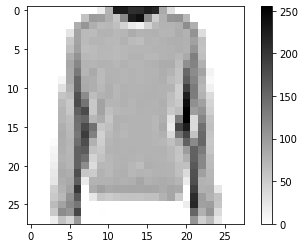

In [18]:
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

## **Normalize Data**

In [19]:
def normalize_dataset(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255

  return images, labels

In [20]:
train_dataset = train_dataset.map(normalize_dataset)
test_dataset = test_dataset.map(normalize_dataset)

In [21]:
for image, label in train_dataset.take(1):
  break

In [22]:
image.numpy().reshape(28, 28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.07058824,
        0.3019608 , 0.8901961 , 0.8901961 , 0.8156863 , 0.8235294 ,
        0.88235295, 0.84705883, 0.33333334, 0.1254902 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.23921569, 0.39215687, 0.38039216,
        0.3137255 , 0.22352941, 0.45882353, 0.8901961 , 0.93333334,
        0.4509804 , 0.19215687, 0.30588236, 0.41568628, 0.42352942,
        0.2784314 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.31764707, 0.4117647 , 0.3137255 , 0.27058825,
        0.28235295, 0.2509804 , 0.17254902, 0.08235294, 0.05098039,
        0.17254902, 0.2705

In [23]:
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

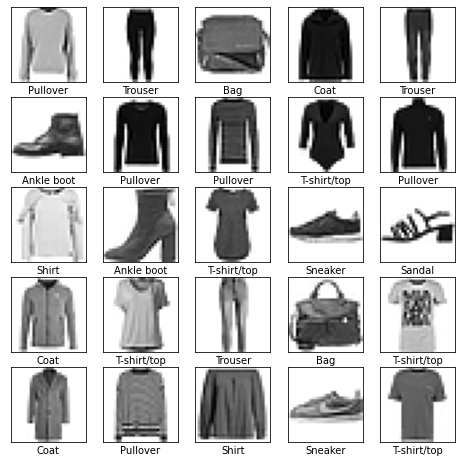

In [24]:
plt.figure(figsize=(8,8))

for i, (image, label) in enumerate(train_dataset.take(25)):
  image = image.numpy().reshape((28, 28))
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])

plt.show()

In [26]:
train_dataset

<CacheDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>

# **Build the Model**

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [28]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [29]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [31]:
train_dataset

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>

In [30]:
num_train_examples/BATCH_SIZE

1875.0

In [ ]:
history = model.fit(train_dataset,
                    epochs=5,
                    steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 10s 2ms/step - loss: 0.4979 - accuracy: 0.8257
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3756 - accuracy: 0.8635
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3321 - accuracy: 0.8794
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3106 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2984 - accuracy: 0.8899


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# **Evaluate the Model**

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset,
                                          steps=math.ceil(num_test_examples/BATCH_SIZE))

313/313 [==============================] - 2s 5ms/step - loss: 0.3426 - accuracy: 0.8778


In [ ]:
print(f'TEST LOSS: {test_loss}')
print(f'TEST ACCURACY: {test_accuracy}')

TEST LOSS: 0.34264859557151794
TEST ACCURACY: 0.8777999877929688


# **Make Predictions**

In [ ]:
for test_image, test_label in test_dataset.take(1):
  test_image = test_image.numpy()
  test_label = test_label.numpy()
  predictions = model.predict(test_image)

In [ ]:
test_label, test_label.shape

(array([4, 4, 9, 7, 5, 1, 0, 5, 7, 4, 0, 8, 2, 3, 9, 0, 7, 7, 2, 2, 0, 4,
        4, 4, 2, 7, 7, 4, 2, 4, 7, 5]), (32,))

In [ ]:
test_image.shape

(32, 28, 28, 1)

In [ ]:
predictions.shape

(32, 10)

In [ ]:
predictions[0]

array([1.3074442e-05, 4.7822336e-06, 1.4087633e-02, 2.6732835e-06,
       9.6099919e-01, 1.4782524e-09, 2.4724625e-02, 3.8030107e-10,
       1.6803878e-04, 8.4586177e-10], dtype=float32)

In [ ]:
np.argmax(predictions, axis=1)

array([4, 4, 5, 7, 5, 1, 0, 5, 7, 4, 0, 8, 2, 3, 9, 0, 7, 7, 2, 2, 0, 4,
       4, 2, 3, 7, 7, 4, 2, 4, 7, 5])

In [ ]:
index = 0
np.argmax(predictions[index]), test_label[index], class_names[test_label[index]]

(4, 4, 'Coat')

# **Visualize**

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, image = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(image[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel(f'{class_names[predicted_label]} - {100*np.max(predictions_array):.2f}  ({class_names[true_label]})', color=color)



In [ ]:
def plot_value_array(i, predictions_array, true_labels):
  predictions_array, true_label = predictions_array[i], true_labels[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')

  # The ylim() function in pyplot module of matplotlib library is used to get or set the y-limits of the current axes.
  plt.ylim([0, 1])


  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

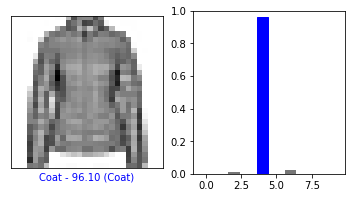

In [ ]:
i = 0
plt.figure(figsize=(6, 3 ))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_label, test_image)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_label)


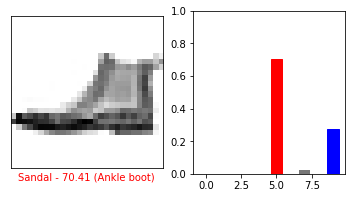

In [ ]:
i = 2
plt.figure(figsize=(6, 3 ))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_label, test_image)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_label)


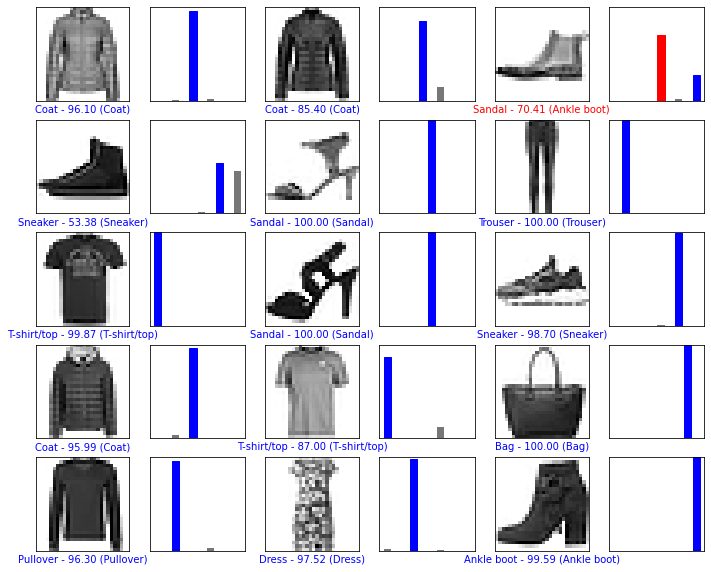

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_label, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_label)

In [ ]:
img = test_image[0]

In [ ]:
img.shape

(28, 28, 1)

In [ ]:
img = np.array([img])
img.shape

(1, 28, 28, 1)

In [ ]:
predict_single = model.predict(img)
predict_single

array([[1.3074442e-05, 4.7822518e-06, 1.4087646e-02, 2.6732835e-06,
        9.6099919e-01, 1.4782496e-09, 2.4724636e-02, 3.8030107e-10,
        1.6803926e-04, 8.4586177e-10]], dtype=float32)

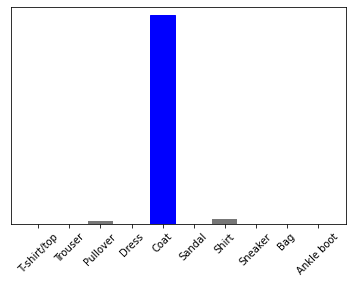

In [ ]:
plot_value_array(0, predict_single, test_label)
_ = plt.xticks(range(10), class_names, rotation=45)